# Introduction to Keras 
## II. Using a pretrained model

#### Alec Chapman

This tutorial was adapted from [this keras blog](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)


The data comes from a [Kaggle competition to classify images as being cats or dogs. The data can be downloaded [here](https://www.kaggle.com/c/dogs-vs-cats/data) after signing into Kaggle (either via a Kaggle account or Google, Facebook, or Yahoo!).

### Import some modules needed for our tutorial

In [16]:
import glob, os
import random
import numpy as np
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.models import load_model
from skimage.io import imshow
import matplotlib.pyplot as plt

### Set the data directory paths

In [17]:
DATADIR = '/home/jovyan/DATA/keras_cat_dog/data'
TRAINDIR = os.path.join(DATADIR, 'train')
VALDIR = os.path.join(DATADIR, 'val')
assert os.path.exists(DATADIR)

## Overview - Pretrained Models
In the last notebook, we saw how we can create a Convolutional Neural Network from scratch and train it on our data. However, training can take a long time, and you don't want to have to train every time you want to make predictions with your model.

Keras makes it very easy to load in pretrained models. We'll load in a model that was trained using our data and use our validation data to evaluate its performance.

In [17]:
!ls /srv/DATA/keras_cat_dog/data

train  val


In [18]:
model = load_model(os.path.join(DATADIR, '..', 'cnn.h5'))

The architecture of the model is defined in a JSON object that can be accessed with `get_config()`. This plus the weights is how Keras deals with serialization. We can print this out to see the details of our architecture (and verify that it's the same as the model we defined).

In [19]:
model.get_config()

[{'class_name': 'Conv2D',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'batch_input_shape': (None, 227, 227, 3),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'data_format': 'channels_last',
   'dilation_rate': (1, 1),
   'dtype': 'float32',
   'filters': 96,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'kernel_size': (11, 11),
   'name': 'conv2d_28',
   'padding': 'valid',
   'strides': (4, 4),
   'trainable': True,
   'use_bias': True}},
 {'class_name': 'BatchNormalization',
  'config': {'axis': -1,
   'beta_constraint': None,
   'beta_initializer': {'class_name': 'Zeros', 'config': {}},
   'beta_regularizer': None,
   'center': True,
   'epsilon': 0.001,
   'gamma_constraint': None,
   'gamma_initial

In [22]:
model.weights

[<tf.Variable 'conv2d_28_1/kernel:0' shape=(11, 11, 3, 96) dtype=float32_ref>,
 <tf.Variable 'conv2d_28_1/bias:0' shape=(96,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_29_1/gamma:0' shape=(96,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_29_1/beta:0' shape=(96,) dtype=float32_ref>,
 <tf.Variable 'conv2d_29_1/kernel:0' shape=(5, 5, 96, 256) dtype=float32_ref>,
 <tf.Variable 'conv2d_29_1/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_30_1/gamma:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_30_1/beta:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'conv2d_30_1/kernel:0' shape=(3, 3, 256, 384) dtype=float32_ref>,
 <tf.Variable 'conv2d_30_1/bias:0' shape=(384,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_31_1/gamma:0' shape=(384,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_31_1/beta:0' shape=(384,) dtype=float32_ref>,
 <tf.Variable 'conv2d_31_1/kernel:0' shape=(3, 3, 384, 256) dtype=float3

# Evaluation
We're finally ready to evaluate our model on our validation set! Like in the first notebook, we'll create an image generator that will load images in, reshape them, normalize the pixel values, and pass them along to our model for prediction.

In [23]:
validation_generator = test_datagen.flow_from_directory(
        VALDIR,
        target_size=(227, 227),
        batch_size=16,
        class_mode='binary')

Found 500 images belonging to 2 classes.


In [26]:
loss, acc = model.evaluate_generator(validation_generator, steps=500//16)
print("Accuracy: {} Loss: {}".format(acc, loss))

Accuracy: 0.7681451612903226 Loss: 0.4887146286426052


In [50]:
validation_generator = test_datagen.flow_from_directory(
        VALDIR,
        target_size=(227, 227),
        batch_size=16,
        class_mode='binary')
X_batch, y_batch = next(validation_generator)
y_pred = model.predict_classes(X_batch)

Found 500 images belonging to 2 classes.
16/16 [==============================] - 0s 8ms/step


In [53]:
y_pred[0][0]

1

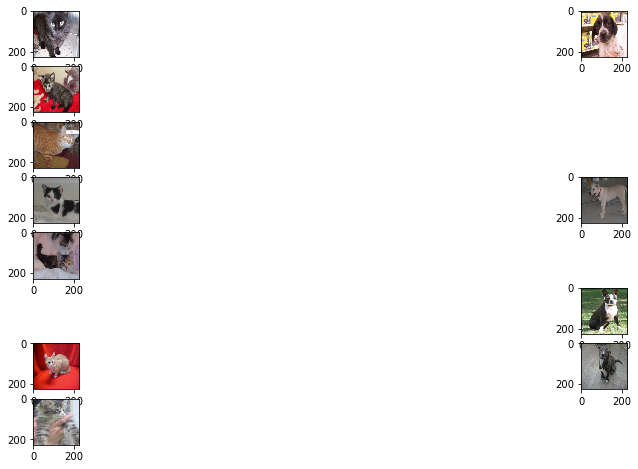

In [64]:
# Let's visualize our predictions
# The left column will show all of the images that our model thinks are cats,
# the right will show all of the images that our model thinks are dogs

ncols = 2
nimg = X_batch.shape[0]

fig = plt.figure(figsize=(18,9))
for i in range(len(x_batch)):
    x = X_batch[i]
    y = y_batch[i]
    ax = plt.subplot2grid((nimg//ncols+1, ncols), (i//ncols,y_pred[i][0]))
    ax.imshow(x)
    #img = array_to_img(x)
    #img.show()